## ДЗ 3
#### Построить многочлен Лагранжа 10-ой степени для функции $f(x) = \frac{1}{1+x^2}$  на интервале [-1, 1]

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Зададим начальные точки, по которым будет интерполироваться функция

In [35]:
def fx(x:float):
  return 1 / (1 + 40 * x ** 2)

def get_equal_points():
  x0 = np.linspace(-1, 1, 11)
  y0 = [fx(x) for x in x0]
  return x0, y0

Посмотрим на полученные точки:

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[0.024390243902439025, 0.037593984962406006, 0.06493506493506494, 0.1351351351351352, 0.38461538461538475, 1.0, 0.3846153846153842, 0.13513513513513506, 0.06493506493506492, 0.037593984962406006, 0.024390243902439025]


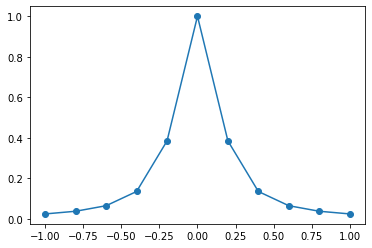

In [41]:
x0, y0 = get_equal_points()
print(x0)
print(y0)
plt.plot(x0, y0, 'o-')
plt.show()

Напишем функцию, реализующию интерполяцию Гаусса по формулам:
$$L(x) = \sum_{i=0}^{n}{y_i l_i(x)} $$ \\
$$l_i(x) = \prod_{j=0,j\neq i}^{n}\frac{x-x_j}{x_i-x_j}$$ \\
$$l_i(x_j) = \begin{cases} 0, j \neq i, \\\ 1, j = i \end{cases}$$

In [37]:
def interpolate(x0, y0, x):
  val = 0
  for i in range(len(y0)):
    l1 = 1
    l2 = 1
    for j in range(len(x0)):
      if i != j:
        l1 *= x - x0[j]
        l2 *= x0[i] - x0[j]
    val += y0[i] * l1 / l2
  return val 

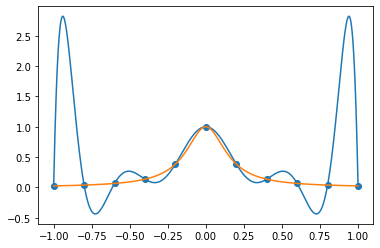

In [44]:
x = np.linspace(np.min(x0), np.max(x0), 1000)
y = [interpolate(x0, y0, k) for k in x]
xp = np.linspace(-1, 1, 1000)
yp = [fx(x) for x in xp]
plt.plot(x, y)
plt.scatter(x0, y0)
plt.plot(xp, yp)
plt.show()

Мы можем наблюдать "скачки" интерполированной функции, что не является удовлетворительным результатом при решении задачи интерполяции.